<a href="https://colab.research.google.com/github/Ch-Lokesh/deeplearning_models/blob/master/conv_nn_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn      #to perform kfold
from tensorflow import keras


In [0]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

normalized data works good for neural networks

In [0]:
x_train = tf.keras.utils.normalize(x_train)
x_test = tf.keras.utils.normalize(x_test)

Summarizing the data

In [4]:
print("shape of training_data = %s and test data is %s"%(x_train.shape, x_test.shape))

shape of training_data = (60000, 28, 28) and test data is (10000, 28, 28)


i.e, training data contains 60000 instances each of 28*28 pixels, and test data contains 10000 instances / images of 28*28 pixels, ingeneral we don't get same sized data/pictures in real life projects we need to resize them.

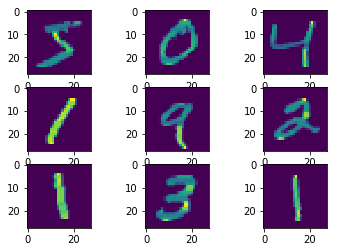

In [5]:
for i in range(9):
    plt.subplot(3, 3 ,1 + i)
    plt.imshow(x_train[i])
    
    
plt.show()
    

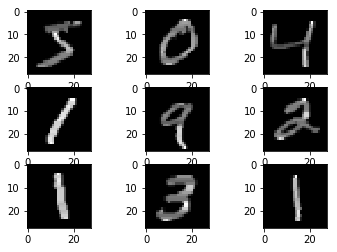

In [6]:
#to get grey scale data
for i in range(9):
    plt.subplot(3, 3, 1 + i)
    plt.imshow(x_train[i], cmap = 'gray')
    
plt.show()

In [0]:
x_trian = x_train.reshape(x_train.shape[0],28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


In [8]:
for i in range(9):
    print(y_train[i])

5
0
4
1
9
2
1
3
1


with one hot encoding shape of the each y is changed to a row matrix of length 10 in which  only one value will be 

In [0]:
y_train_hot = tf.keras.utils.to_categorical(y_train)
y_test_hot = tf.keras.utils.to_categorical(y_test)


In [10]:
for i in range (9):
    print(y_train_hot[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


On one hot encoding the shape of the y_test and y_train changed into a row matrix of lenght 10 in which only one value will be one and remaining all we be zero 

In [0]:
#creating a model
model = tf.keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape = (28, 28, 1) ))
#initially we need not to flatten the data as we done in the other models bcz we need 2d arrays in conv models

32 is the number of filters <br>
(3, 3) is the shape of each filter<br>
it is better to give the no. of filters in the power of 2  and the filter size as add<br>
by default strides = (1, 1)<br>
padding takes two values valid or same, valid implies no padding and same implies that the output shape won't change on convolution



In [12]:
#model needed to be max pooled after convolution
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(120, activation='relu', kernel_initializer='he_uniform'))
model.add(keras.layers.Dense(10, activation='softmax'))   #for last layer softmax activation function give max probability

opt = keras.optimizers.SGD(lr = 0.01, momentum = 0.9)
model.compile(opt, loss='categorical_crossentropy', metrics = ['accuracy'])


W0813 17:38:24.215706 139641348491136 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [15]:
x_train_shaped = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test_shaped = x_test.reshape(x_test.shape[0], 28, 28, 1)
model_1 = model
model_1.fit(x_train_shaped, y_train_hot)

60000/60000 [==============================] - 36s 601us/sample - loss: 0.2108 - acc: 0.9352


In [20]:
print(x_test[0].shape)

(28, 28, 1)


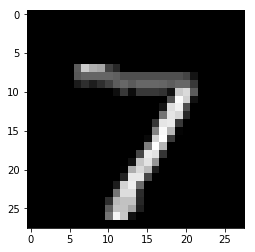

In [22]:
plt.imshow(x_test[0].reshape(28, 28), cmap = 'gray')
plt.show()

In [0]:
predictions = model_1.predict([x_test_shaped])


In [30]:
print(np.argmax(predictions[0]))

7


In [31]:
model.evaluate(x_test_shaped, y_test_hot)

10000/10000 [==============================] - 2s 206us/sample - loss: 0.0873 - acc: 0.9721


[0.08727053869701921, 0.9721]